In [1]:
!nvidia-smi

Sat Jul 29 12:55:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.3 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import DiffusionPipeline

from matplotlib import pyplot as plt

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Diffusion model from `stability.ai`
The `DiffusionPipeline` is used for running inference on the Diffusion models, which are powerful generative models designed for image synthesis and related tasks.

### Initializing the pipeline with several options:

1. `from_pretrained`: This method is used to load the pre-trained model specified by the provided model identifier (in this case, "stabilityai/stable-diffusion-xl-refiner-1.0").

2. `torch_dtype`: This parameter specifies the torch datatype to be used during inference. In this case, it is set to `torch.float16`, which represents 16-bit floating-point numbers (half precision). This can be used to reduce memory usage and speed up computations, but it may cause a slight loss in precision compared to `torch.float32` (32-bit floating-point numbers).

3. `use_safetensors`: This parameter is used to enable the use of "SafeTensors" in the pipeline. SafeTensors help mitigate NaN/Inf issues in gradient-based optimization and can be helpful when dealing with difficult gradient landscapes.

4. `variant`: This parameter specifies the variant of the model to be used. In this case, it is set to "fp16", which likely indicates that the model variant uses 16-bit floating-point precision (float16) for better memory and speed performance.


In [5]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
                                         torch_dtype=torch.float16,
                                         use_safetensors=True,
                                         variant="fp16")
pipe.to("cuda")

prompt = "A man running after iron man with batman on his back and joker in his hand"

images = pipe(prompt=prompt).images[0]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

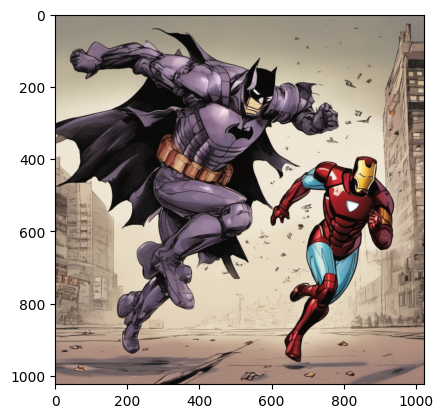

In [6]:
plt.imshow(images)

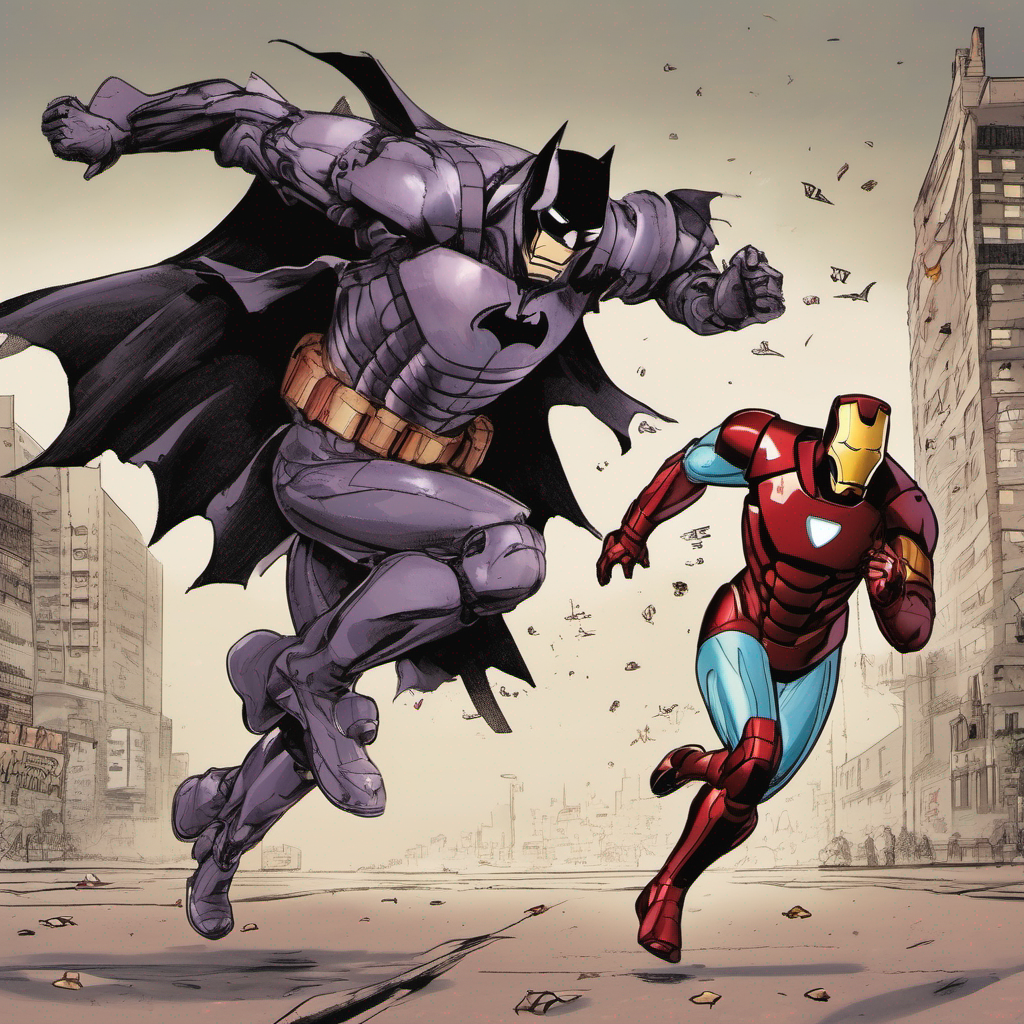

In [7]:
images

In [8]:
prompt = "A man sitting in sun eating corn"

predict_images = pipe(prompt=prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
predict_images

StableDiffusionXLPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7AA3EC15A080>])

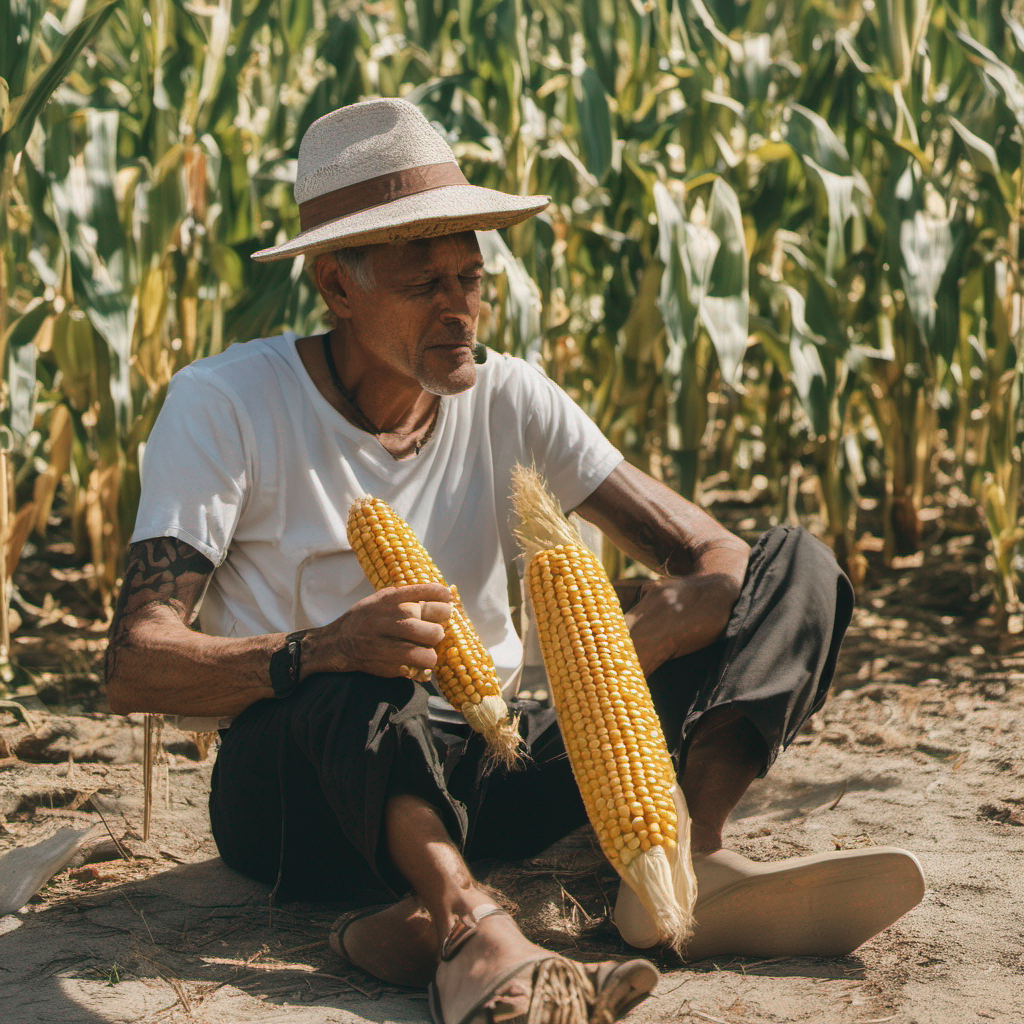

In [10]:
predict_images.images[0]